## Data Prep Series from LinkedIn Learning
### Removing duplicates

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [4]:
df_object = DataFrame({'column 1': [1,1,2,2,3,3,3],
                       'column 2':['a','a','b','b','c','c','c'],
                       'column 3':['A','A','B','B','C','C','C']})

df_object                       

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [7]:
df_object.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [8]:
df_object.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [9]:
df_object = DataFrame({'column 1': [1,1,2,2,3,3,3],
                       'column 2':['a','a','b','b','c','c','c'],
                       'column 3':['A','A','B','B','C','D','C']})

df_object    

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [10]:
df_object.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


### Concatenation & Transformation

In [11]:
df_obj = pd.DataFrame(np.arange(36).reshape(6,6))
df_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [12]:
df_obj_2 = pd.DataFrame(np.arange(15).reshape(5,3))
df_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


### Concatenating data

In [13]:
pd.concat([df_obj, df_obj_2], axis = 1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [14]:
pd.concat([df_obj, df_obj_2])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


### Transforming Data

In [15]:
df_obj.drop([0,2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [16]:
df_obj.drop([0,2], axis =1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


### Adding Data

In [17]:
series_obj = Series(np.arange(6))
series_obj.name = 'added_variable'
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int64

In [18]:
variable_added = DataFrame.join(df_obj, series_obj)
variable_added

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [19]:
added_datatable = variable_added.append(variable_added, ignore_index=False)
added_datatable

/var/folders/0d/pgx59prx25q_12vq2yt8dvtw0000gn/T/ipykernel_32818/426574045.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  added_datatable = variable_added.append(variable_added, ignore_index=False)


,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [20]:
added_datatable = variable_added.append(variable_added, ignore_index=True)
added_datatable

/var/folders/0d/pgx59prx25q_12vq2yt8dvtw0000gn/T/ipykernel_32818/4230768127.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  added_datatable = variable_added.append(variable_added, ignore_index=True)


,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


In [ ]:
### Sorting Data

In [21]:
df_sorted = df_obj.sort_values(by=(5),ascending =[False])
df_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


## Grouping and Aggregation

### Group data by column index

In [36]:
#address = 'c:/userer/bradga/exercisefiles/data/mtcars.csv'
address = '/Users/bradleygauvin/codeup-data-science/LinkedIn_Exercises/DS-python-Exercise-Files/Data/mtcars.csv'

cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qset','vs','am','gear','carb']

In [37]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qset,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [39]:
cars_groups = cars.groupby('cyl')
cars_groups.mean()

,mpg,disp,hp,drat,wt,qset,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [40]:
# Quiz question
cars.groupby('am').mean()

,mpg,cyl,disp,hp,drat,wt,qset,vs,gear,carb
am,,,,,,,,,,
0,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,3.210526,2.736842
1,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,4.384615,2.923077


# Data Vis

In [55]:
from numpy.random import randn
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

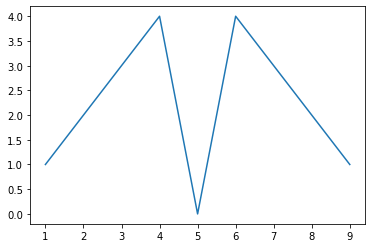

In [42]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

In [43]:
mpg = cars['mpg']

<AxesSubplot:>

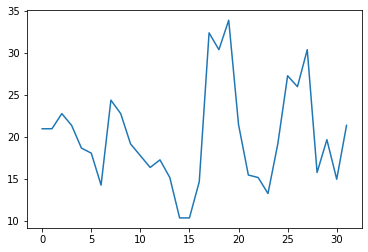

In [45]:
mpg.plot()

<AxesSubplot:>

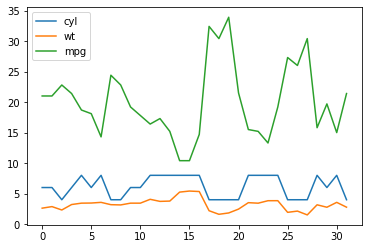

In [46]:
df = cars[['cyl','wt','mpg']]
df.plot()

### Creating bar charts

<BarContainer object of 9 artists>

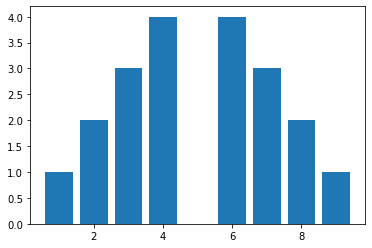

In [47]:
plt.bar(x,y)

<AxesSubplot:>

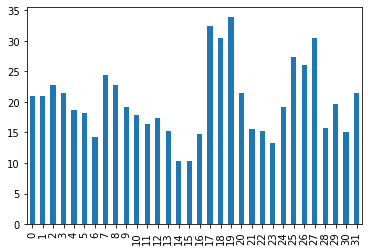

In [48]:
mpg.plot(kind = 'bar')

<AxesSubplot:>

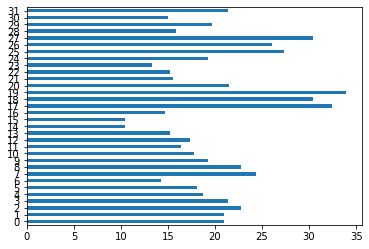

In [49]:
mpg.plot(kind = 'barh')

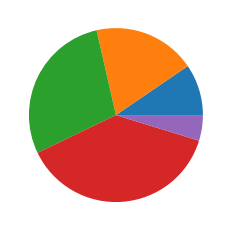

In [50]:
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

### Save

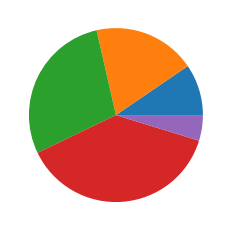

In [51]:
plt.pie(x)
plt.savefig('pie_chart.png')
plt.show()

In [52]:
%pwd

'/Users/bradleygauvin/codeup-data-science/LinkedIn_Exercises/Ex_Files_Python_Code_Challenges_2022'

In [56]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

### Defining axes, ticks, and grids

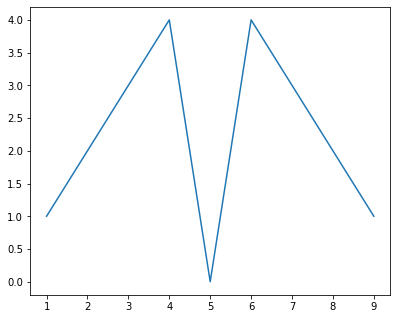

In [58]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.plot(x,y)

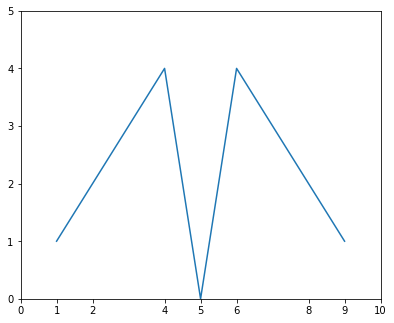

In [59]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

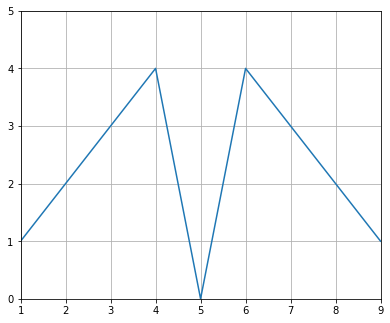

In [60]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

### Generating multiple plots in one figure with subplots

<Figure size 360x288 with 0 Axes>

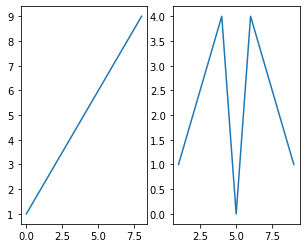

In [62]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(x)
ax2.plot(x,y)

## Plot Formatting

<BarContainer object of 9 artists>

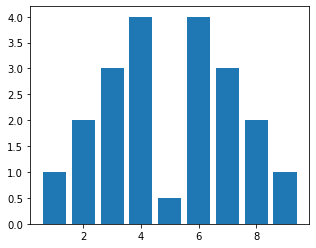

In [63]:
x = range(1,10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x,y)

<BarContainer object of 9 artists>

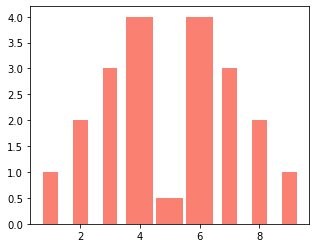

In [64]:
wide = [.5, .5, .5, .9, .9,.9,.5,.5,.5]
color = ['salmon']
plt.bar(x,y, width = wide , color = color, align = 'center')

<AxesSubplot:>

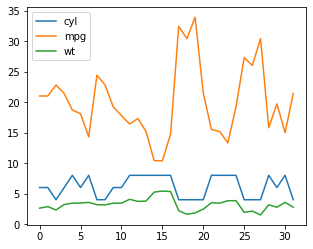

In [65]:
df = cars[['cyl','mpg','wt']]
df.plot()

<AxesSubplot:>

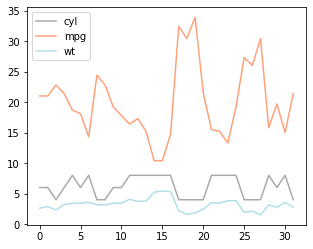

In [67]:
color_theme = ['darkgray','lightsalmon','powderblue']
df.plot(color = color_theme)

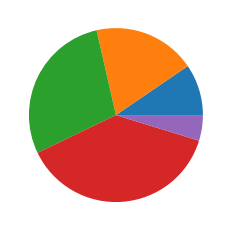

In [68]:
z = [1,2,3,4,.5]
plt.pie(z)
plt.show()

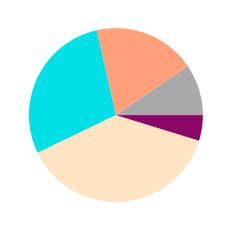

In [71]:
color_theme = ['#A9A9A9', '#FFA07A', '#00E0E6', '#FFE4C4','#8C0768']
plt.pie(z, colors = color_theme)
plt.show()

### Customize Line Styles

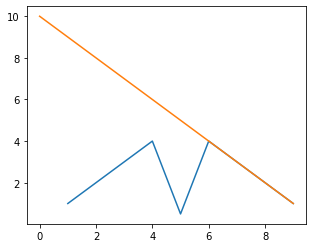

In [73]:
x1 = range(0,10)
y1 = [10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y)
plt.plot(x1,y1)

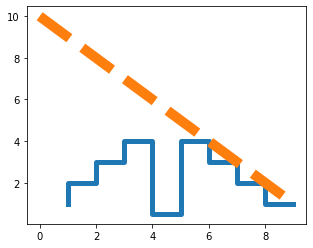

In [74]:
plt.plot(x,y, ds = 'steps', lw = 5)
plt.plot(x1,y1, ls = '--', lw = 10)

### Setting plot markers

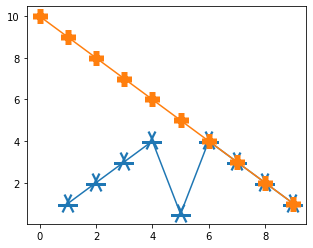

In [76]:
plt.plot(x,y, marker = '1', mew = 20)
plt.plot(x1,y1, marker = '+', mew = 15)

## Labels and annotations

## Labeling Plot features

### Functional Method

Text(0, 0.5, 'Your y label')

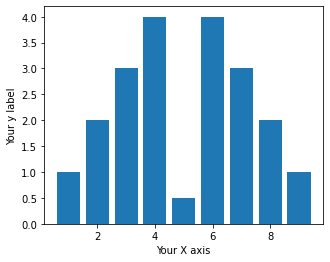

In [78]:
x = range(1,10)
y = [1,2,3,4,.5,4,3,2,1]

plt.bar(x,y)
plt.xlabel('Your X axis')
plt.ylabel('Your y label')

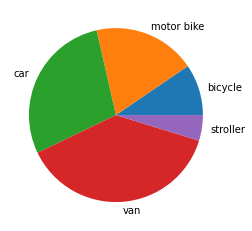

In [79]:
z = [1,2,3,4,.5]

veh_type = ['bicycle', 'motor bike','car','van','stroller']

plt.pie(z, labels = veh_type)
plt.show()

### The object-oriented method

### Adding a legend to your plot

### Functional Method

Text(0, 0.5, 'mpg')

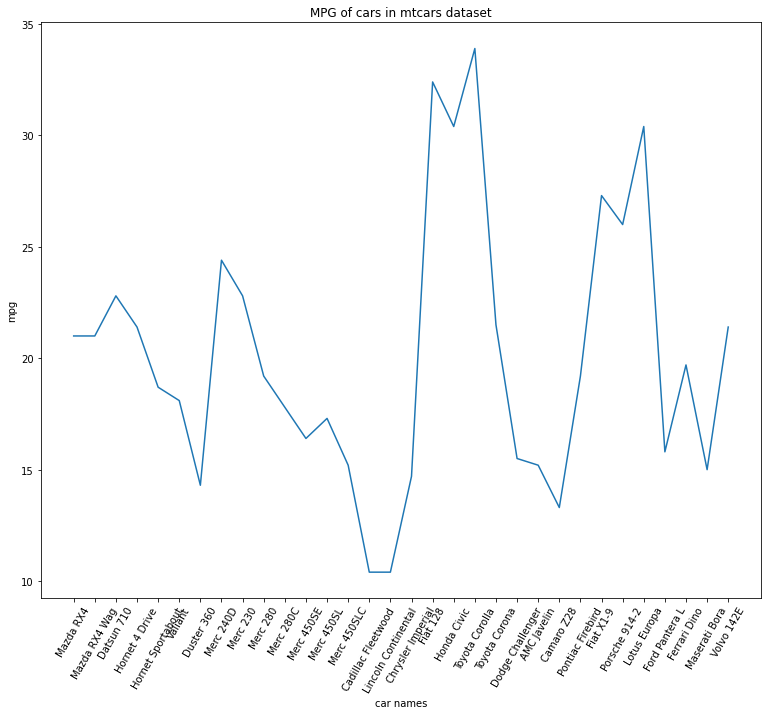

In [89]:
mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.2,.2,2,2])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('MPG of cars in mtcars dataset')

ax.set_xlabel('car names')
ax.set_ylabel('mpg')

### adding a legend

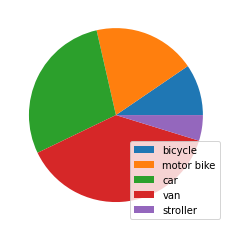

In [90]:
plt.pie(z)
plt.legend(veh_type, loc = 'best')
plt.show()

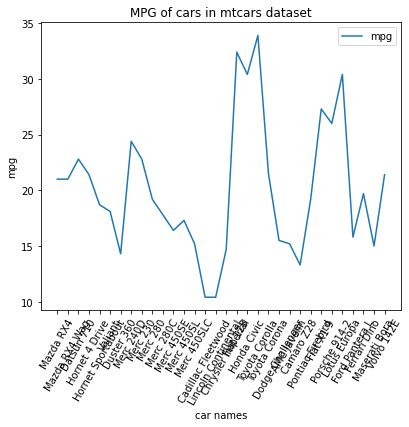

In [92]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('MPG of cars in mtcars dataset')

ax.set_xlabel('car names')
ax.set_ylabel('mpg')

ax.legend(loc = 'best')

In [93]:
mpg.max()

33.9

Text(21, 35, 'Toyota Corolla')

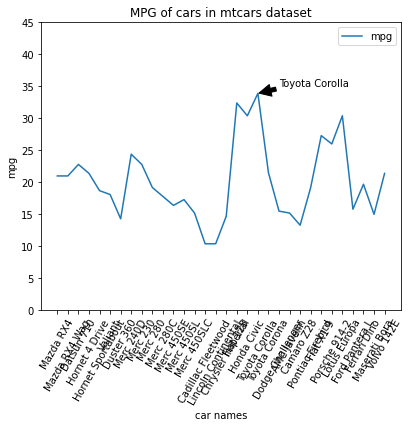

In [94]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('MPG of cars in mtcars dataset')

ax.set_xlabel('car names')
ax.set_ylabel('mpg')

ax.legend(loc = 'best')

ax.set_ylim(0, 45)

ax.annotate('Toyota Corolla', xy = (19,33.9), xytext = (21,35), 
           arrowprops = dict(facecolor = 'black', shrink = 0.05))

## Time Series

### The simplest time series plot

In [102]:
address2= '/Users/bradleygauvin/codeup-data-science/LinkedIn_Exercises/DS-python-Exercise-Files/Data/Superstore-Sales.csv'
df = pd.read_csv(address2, index_col = 'Order Date', encoding = 'cp1252', parse_dates = True)

df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<AxesSubplot:xlabel='Order Date'>

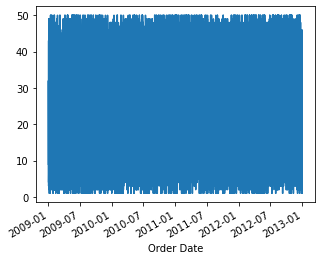

In [103]:
df['Order Quantity'].plot()

<AxesSubplot:title={'center':'Superstore Sales'}, xlabel='Order Date', ylabel='Order Quantity'>

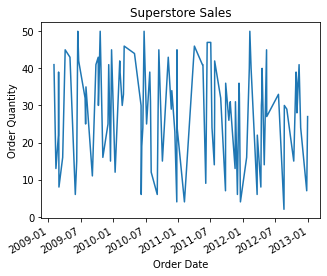

In [107]:
df2 = df.sample(n=100, random_state = 25, axis = 0)
plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

## Statistical Data graphics

In [108]:
import seaborn as sb
sb.set_style('whitegrid')

### Eyeballing data distribution and histograms

In [109]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qset,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot:ylabel='Frequency'>

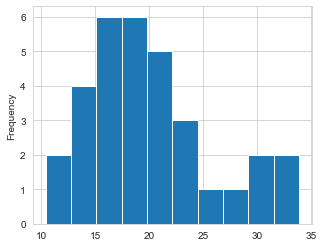

In [111]:
cars.index = cars.car_names

mpg = cars['mpg']

mpg.plot(kind = 'hist')

[]

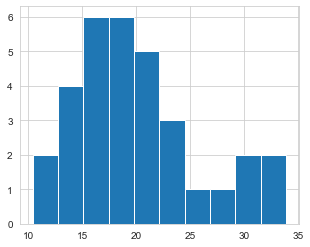

In [112]:
plt.hist(mpg)
plt.plot()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

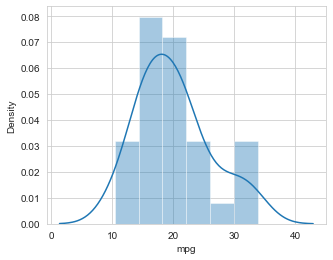

In [113]:
sb.distplot(mpg)

### Scatterplots in action

<AxesSubplot:xlabel='hp', ylabel='mpg'>

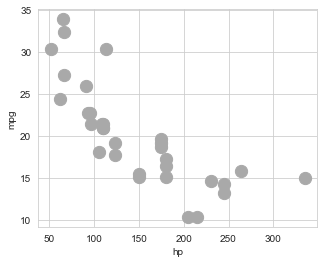

In [114]:
cars.plot(kind = 'scatter', x='hp', y='mpg', c=['darkgrey'], s=150)

<AxesSubplot:xlabel='hp', ylabel='mpg'>

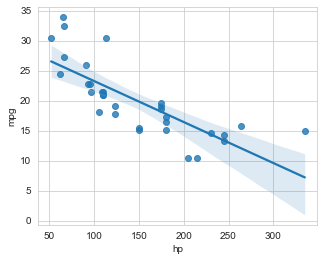

In [115]:
sb.regplot(x='hp', y='mpg', data=cars, scatter = True)

In [116]:
### Scatterplot matrix

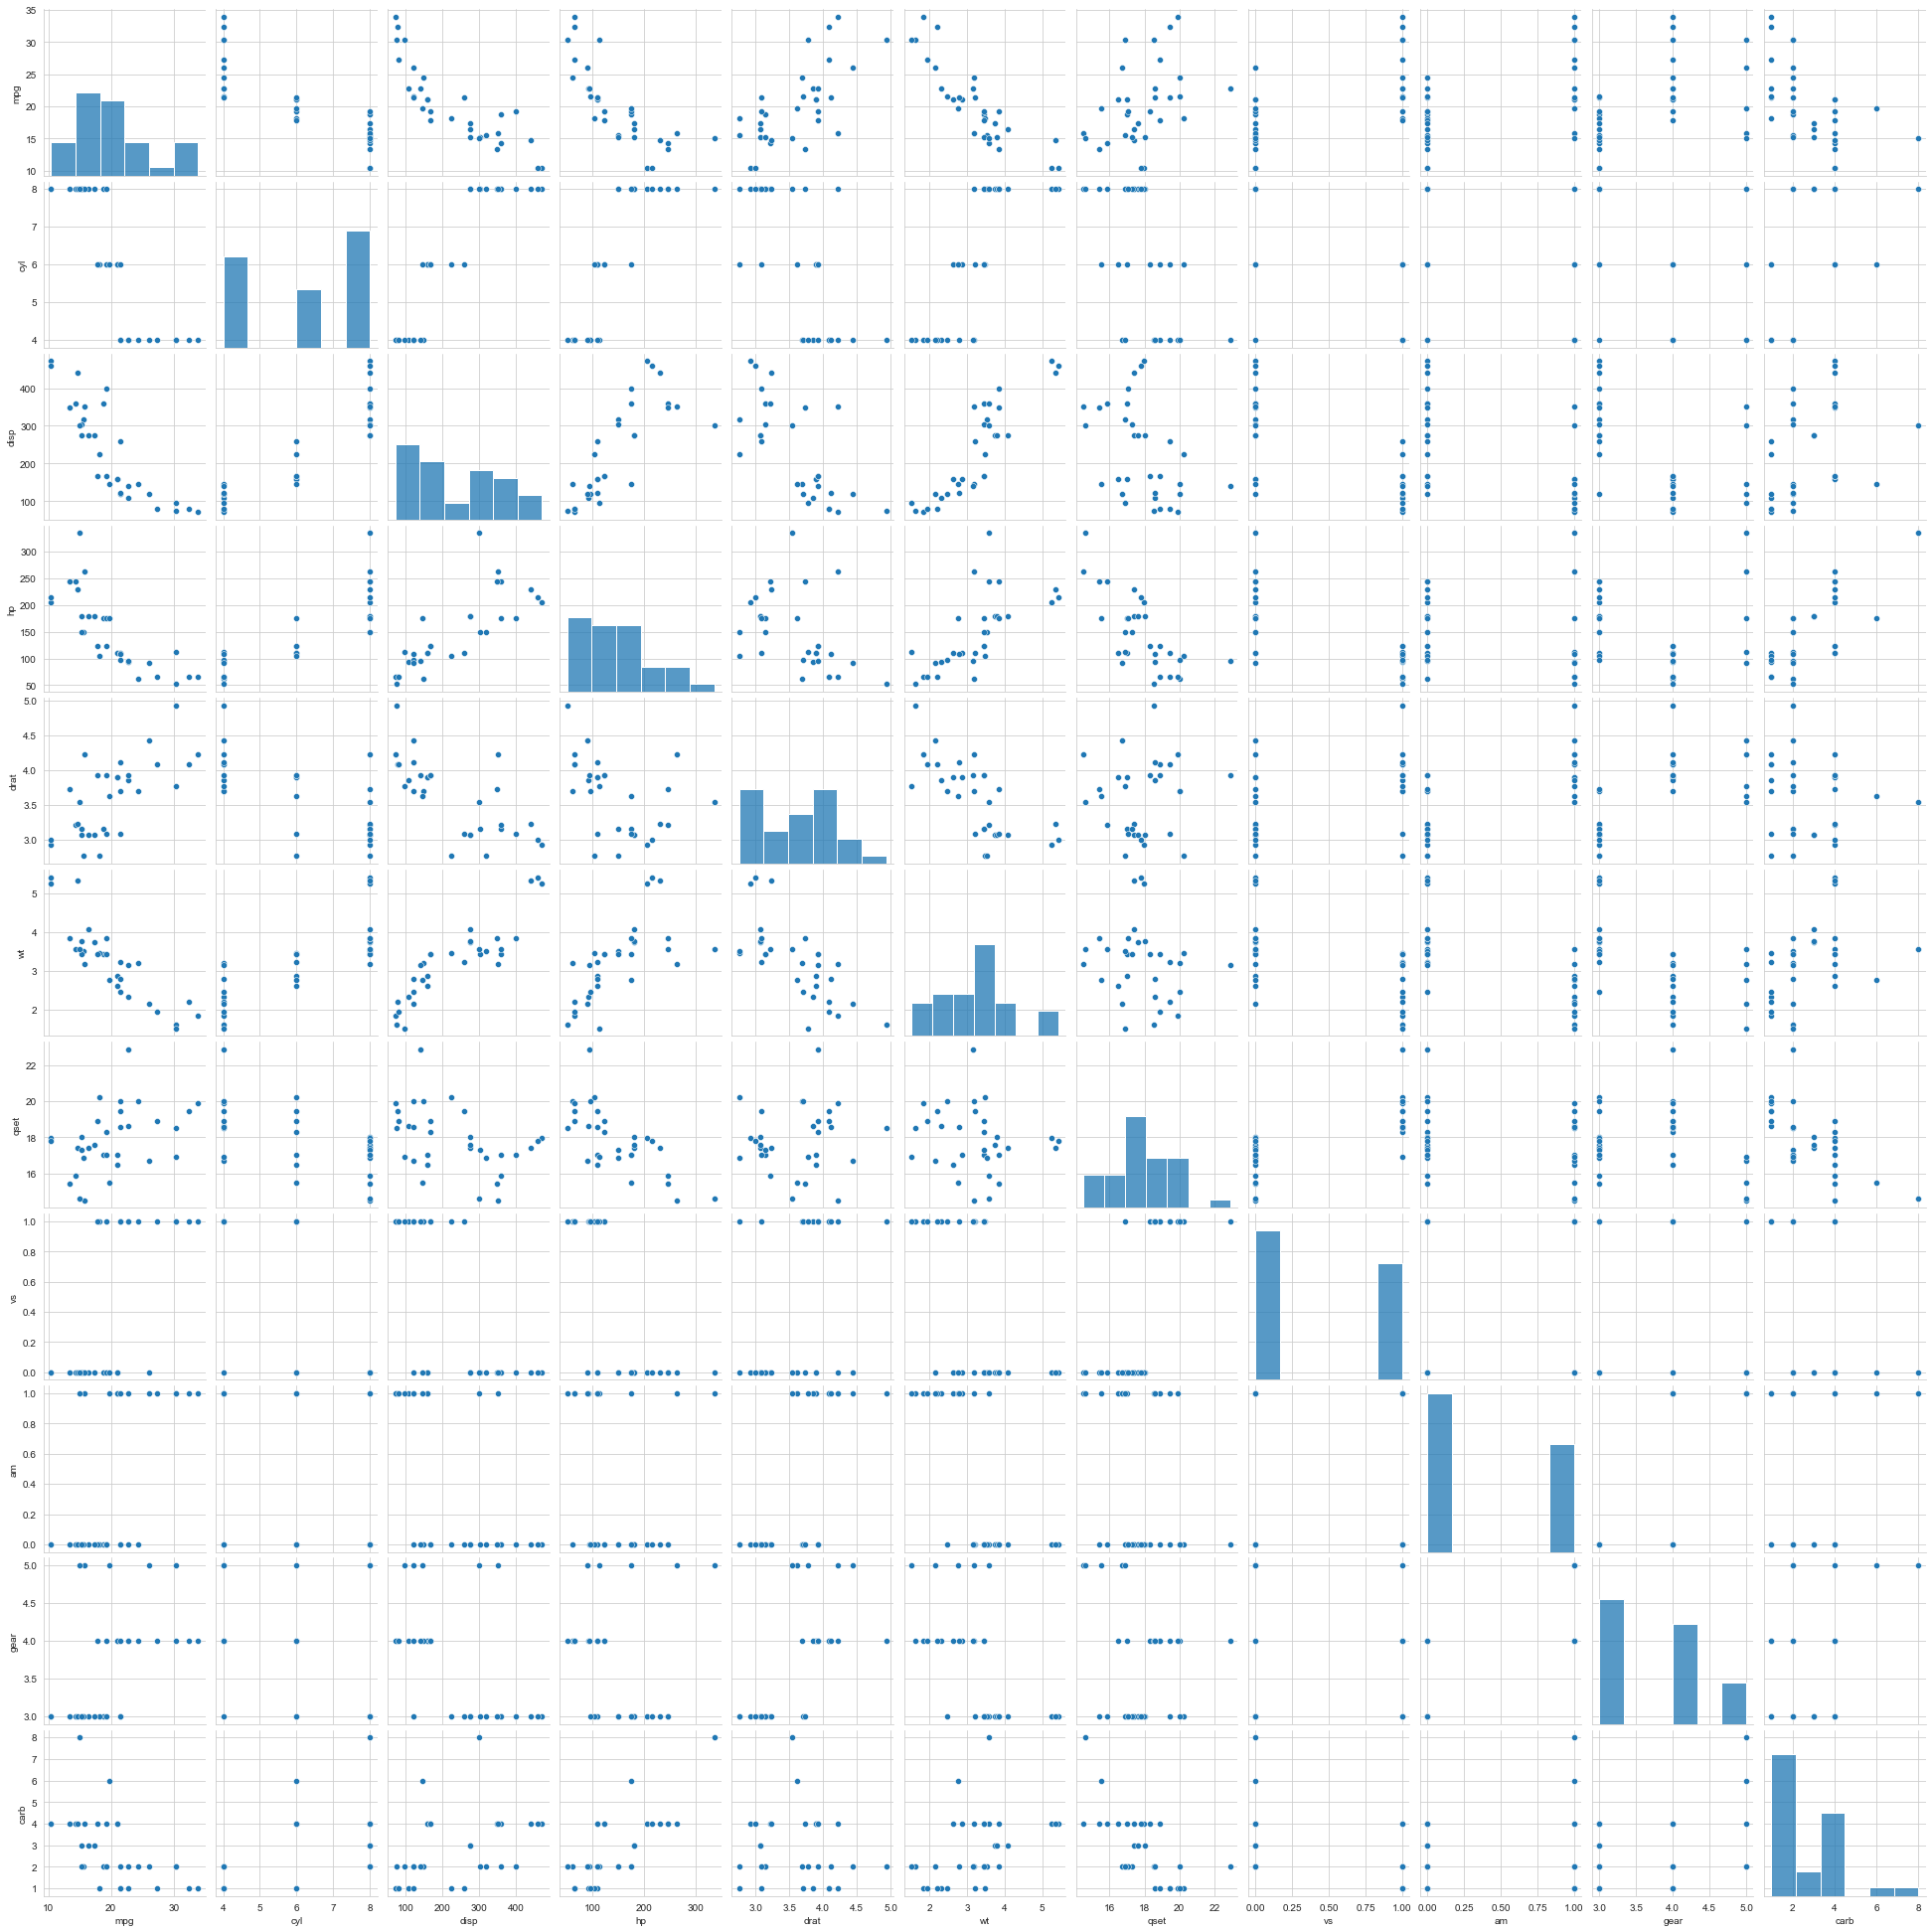

In [117]:
sb.pairplot(cars)

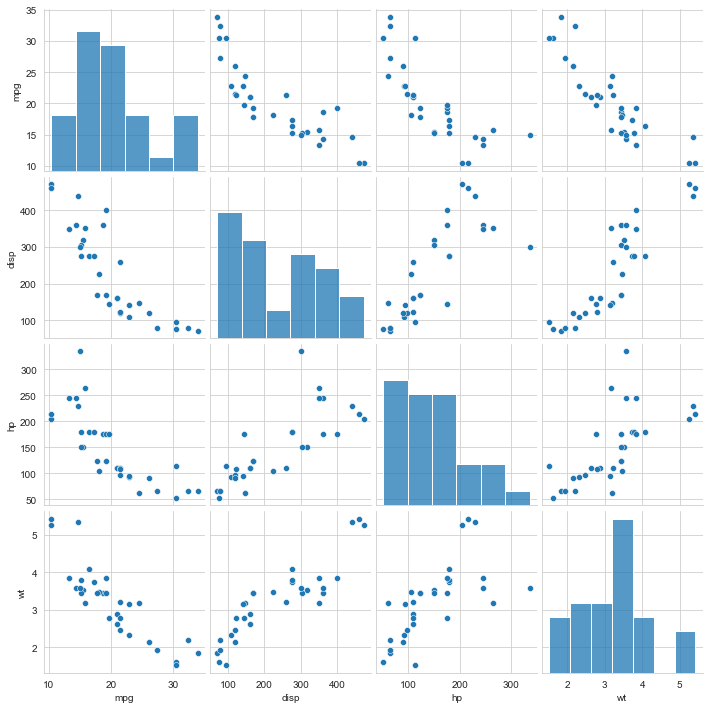

In [119]:
cars_subset = cars[['mpg','disp','hp','wt']]
sb.pairplot(cars_subset)

### Boxplots

<AxesSubplot:title={'center':'wt'}, xlabel='am'>

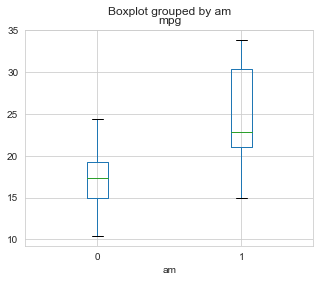

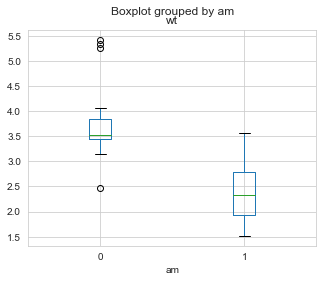

In [120]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column = 'wt', by='am')

<AxesSubplot:xlabel='am', ylabel='mpg'>

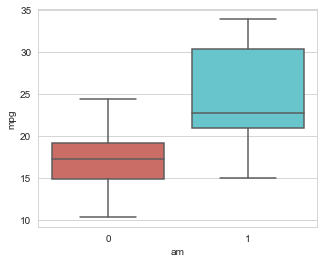

In [121]:
sb.boxplot(x='am',y='mpg', data = cars, palette = 'hls')